In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ltfs-2/train_fwYjLYX.csv
/kaggle/input/ltfs-2/test_1eLl9Yf.csv


In [2]:
# Loading data
train_df = pd.read_csv('/kaggle/input/ltfs-2/train_fwYjLYX.csv', parse_dates=['application_date'])
test_df = pd.read_csv('/kaggle/input/ltfs-2/test_1eLl9Yf.csv', parse_dates=['application_date'])

In [15]:
train_df.shape,test_df.shape

((80402, 6), (180, 3))

In [5]:
train_df.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [17]:
# No. of applications per segment
case_count_by_segment = pd.DataFrame(train_df.groupby(['segment'])['case_count'].agg(sum))
case_count_by_segment['%_Of_Total'] = case_count_by_segment['case_count'].apply \
(lambda x: x/case_count_by_segment['case_count'].sum()*100)

In [18]:
case_count_by_segment

,case_count,%_Of_Total
segment,,
1,2188040.0,14.671922
2,12725071.0,85.328078


Total % of cases with segment 1 are low as compared to cases with segment 2. But somehow, they are presented branch wise. Don't understand why!

In [19]:
# No. of zones
list(train_df.zone.unique())

['EAST', 'NORTH', 'SOUTH', 'WEST', 'CENTRAL', nan]

In [21]:
list(train_df.state.unique())

['WEST BENGAL',
 'DELHI',
 'KARNATAKA',
 'TAMIL NADU',
 'UTTAR PRADESH',
 'PUNJAB',
 'TELANGANA',
 'ANDHRA PRADESH',
 'MAHARASHTRA',
 'ORISSA',
 'GUJARAT',
 'ASSAM',
 'JHARKHAND',
 'UTTARAKHAND',
 'KERALA',
 'CHHATTISGARH',
 'BIHAR',
 'TRIPURA',
 'MADHYA PRADESH',
 'HARYANA']

In [22]:
# Case count by date and segment
case_count_by_date_segment = pd.DataFrame(train_df.groupby(['application_date','segment'])['case_count'].agg(sum))
case_count_by_date_segment.reset_index(drop=False,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


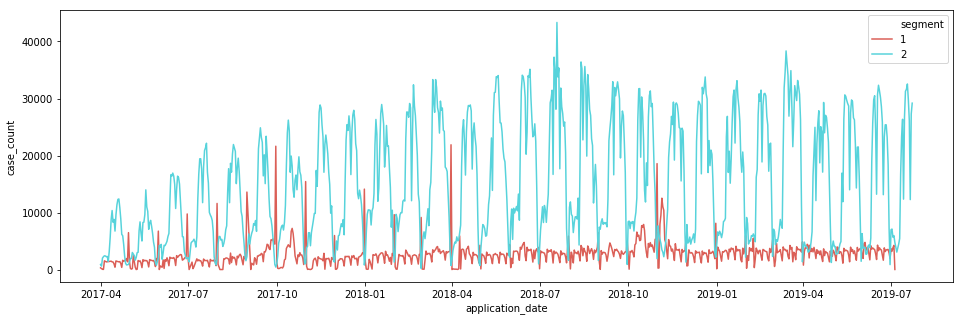

In [23]:
plt.figure(figsize = (16,5))
sns.lineplot(x="application_date",
             y="case_count",
             hue="segment",
             data=case_count_by_date_segment,
             palette=sns.color_palette('hls', n_colors=2))

In [24]:
# Extracting features from application_date
train_df['month'] = train_df['application_date'].dt.month
train_df['day_of_month'] = train_df['application_date'].dt.day
train_df['day_of_week'] = train_df['application_date'].dt.dayofweek
train_df['year'] = train_df['application_date'].dt.year
train_df['year_month'] = train_df.apply(lambda x: str(x['year']) + '_' + str(x['month']), axis=1)

In [25]:
train_df.head()

,application_date,segment,branch_id,state,zone,case_count,month,day_of_month,day_of_week,year,year_month
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,4,1,5,2017,2017_4
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,4,3,0,2017,2017_4
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,4,4,1,2017,2017_4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,4,5,2,2017,2017_4
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,4,7,4,2017,2017_4


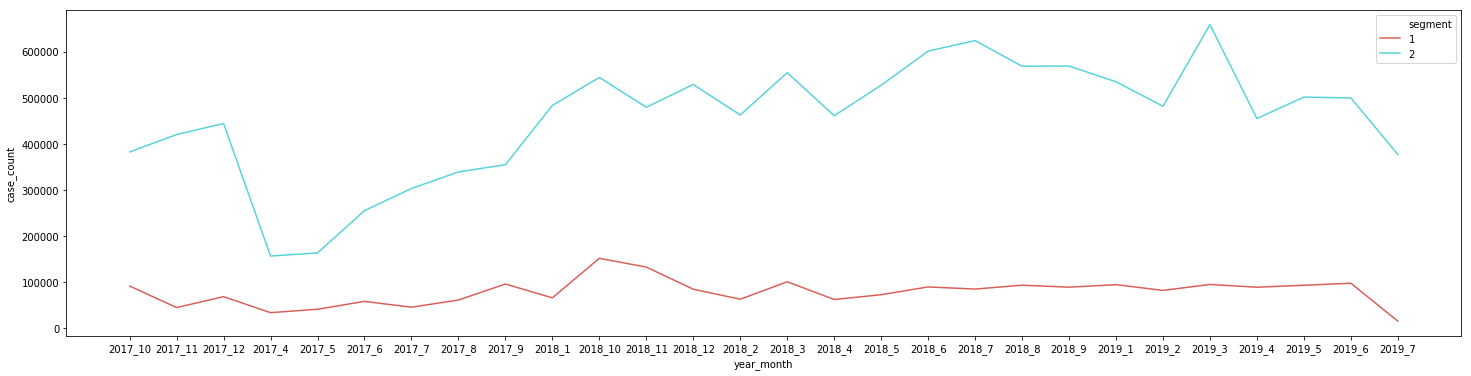

In [26]:
# Case count by date and segment
case_count_by_year_month = pd.DataFrame(train_df.groupby(['year_month','segment'])['case_count'].agg(sum))
case_count_by_year_month.reset_index(drop=False,inplace=True)
plt.figure(figsize = (25,6))
sns.lineplot(x="year_month",
             y="case_count",
             hue="segment",
             data=case_count_by_year_month,
             palette=sns.color_palette('hls', n_colors=2))

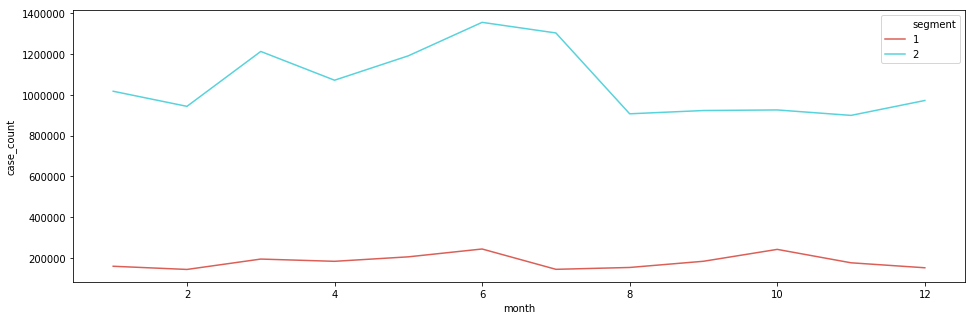

In [27]:
# Case count by date and segment
case_count_by_month = pd.DataFrame(train_df.groupby(['month','segment'])['case_count'].agg(sum))
case_count_by_month.reset_index(drop=False,inplace=True)
plt.figure(figsize = (16,5))
sns.lineplot(x="month",
             y="case_count",
             hue="segment",
             data=case_count_by_month,
             palette=sns.color_palette('hls', n_colors=2))

Sharp increase from Feb to March and then sharp decrease from March to April ???
Again increase in applications from Apr to June and then continous decrese till Aug.
Constant from Aug till Nov and then increase in applications till Dec
Seg - 1
Same observations but in small scale.
Decrease in applications in month of December.

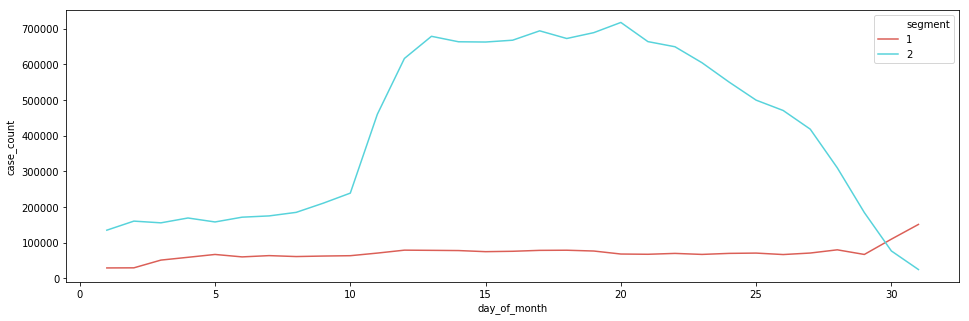

In [28]:
# Case count by date and segment
case_count_by_day_of_month = pd.DataFrame(train_df.groupby(['day_of_month','segment'])['case_count'].agg(sum))
case_count_by_day_of_month.reset_index(drop=False,inplace=True)
plt.figure(figsize = (16,5))
sns.lineplot(x="day_of_month",
             y="case_count",
             hue="segment",
             data=case_count_by_day_of_month,
             palette=sns.color_palette('hls', n_colors=2))

Since salary gets credited till 10th of every month or in the last days of a month, the sharp increase from 10th day of the month and then the sharp decrease from 26th or 27th of the month could you attributed to the fact that retail people opt for loans maybe personal, home or vehical loan.
Sharp increase in first business segment from 30th of every month. Why???

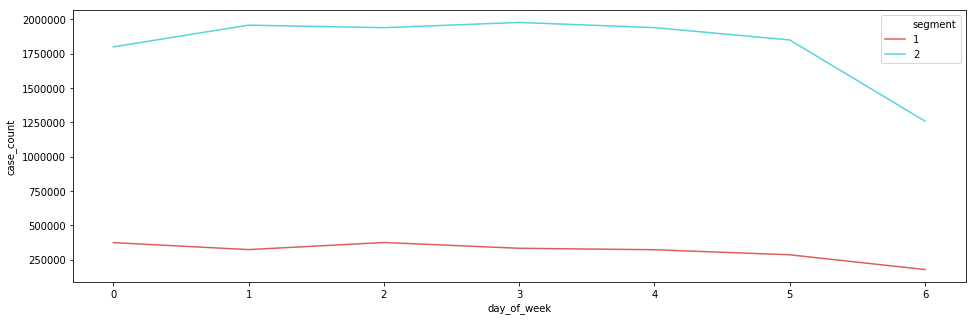

In [29]:
# Case count by date and segment
case_count_by_day_of_week = pd.DataFrame(train_df.groupby(['day_of_week','segment'])['case_count'].agg(sum))
case_count_by_day_of_week.reset_index(drop=False,inplace=True)
plt.figure(figsize = (16,5))
sns.lineplot(x="day_of_week",
             y="case_count",
             hue="segment",
             data=case_count_by_day_of_week,
             palette=sns.color_palette('hls', n_colors=2))

The drop could be due to the fact that 6th day is saturday, and is usually off across most industries. 

In [30]:
train_df.head()

,application_date,segment,branch_id,state,zone,case_count,month,day_of_month,day_of_week,year,year_month
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,4,1,5,2017,2017_4
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,4,3,0,2017,2017_4
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,4,4,1,2017,2017_4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,4,5,2,2017,2017_4
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,4,7,4,2017,2017_4


In [69]:
train_new_df = pd.DataFrame(train_df.groupby(['segment','month','day_of_month','day_of_week','year'])\
                            ['case_count'].agg(sum).reset_index(drop=False))

In [70]:
train_new_df.head()

,segment,month,day_of_month,day_of_week,year,case_count
0,1,1,1,0,2018,1391.0
1,1,1,1,1,2019,125.0
2,1,1,2,1,2018,84.0
3,1,1,2,2,2019,3946.0
4,1,1,3,2,2018,45.0


In [71]:
categoricals = ['segment','month','day_of_month','day_of_week']
target = train_new_df.pop('case_count')
feat_cols = list(train_new_df.columns)
#remove_cols = ['application_date','segment']
#feat_cols = [cols for cols in feat_cols if cols not in remove_cols]
feat_cols.remove('year')
feat_cols

['segment', 'month', 'day_of_month', 'day_of_week']

In [87]:
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'mape',
         'subsample': 0.25,
         'subsample_freq': 1,
         'learning_rate': 0.01, 
         'num_iterations': 3500,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250,
         'lambda_l1': 1,  
         'lambda_l2': 1
         }
folds = 16
seed = 555

kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

models = []

for train_index, val_index in kf.split(train_new_df, train_new_df['month']):
    train_X = train_new_df[feat_cols].iloc[train_index]
    val_X = train_new_df[feat_cols].iloc[val_index]
    train_y = target.iloc[train_index]
    val_y = target.iloc[val_index]
    lgb_train = lgb.Dataset(train_X, train_y, categorical_feature=categoricals)
    lgb_eval = lgb.Dataset(val_X, val_y, categorical_feature=categoricals)
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=(lgb_train, lgb_eval),
                early_stopping_rounds=100,
                verbose_eval = 100)
    models.append(gbm)

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 6471.6	valid_1's rmse: 7073.17
[200]	training's rmse: 4921.05	valid_1's rmse: 5475.34
[300]	training's rmse: 4371.59	valid_1's rmse: 4913.96
[400]	training's rmse: 4123.37	valid_1's rmse: 4670.62
[500]	training's rmse: 3997.15	valid_1's rmse: 4568.52
[600]	training's rmse: 3914.9	valid_1's rmse: 4538.69
[700]	training's rmse: 3858.27	valid_1's rmse: 4542.74
[800]	training's rmse: 3810.95	valid_1's rmse: 4559.18
Early stopping, best iteration is:
[648]	training's rmse: 3887.85	valid_1's rmse: 4536.05
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 6511.33	valid_1's rmse: 6513.5
[200]	training's rmse: 4942.75	valid_1's rmse: 5005.82
[300]	training's rmse: 4396.58	valid_1's rmse: 4528.44
[400]	training's rmse: 4143.94	valid_1's rmse: 4349.03
[500]	training's rmse: 4015.03	valid_1's rmse: 4306.05
[600]	training's rmse: 3937.17	valid_1's rmse: 4310.89
Early stopping, bes

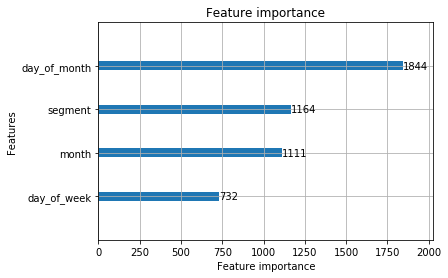

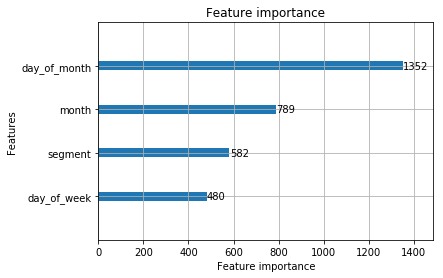

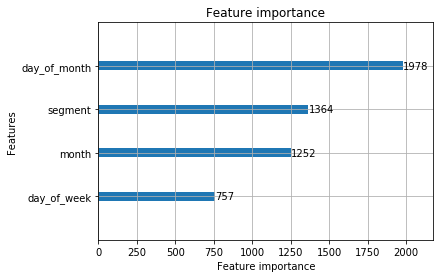

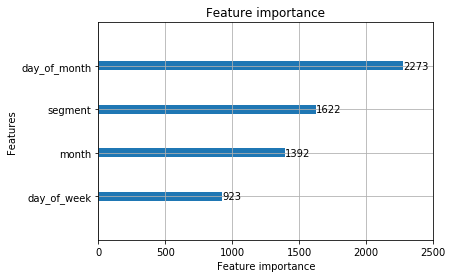

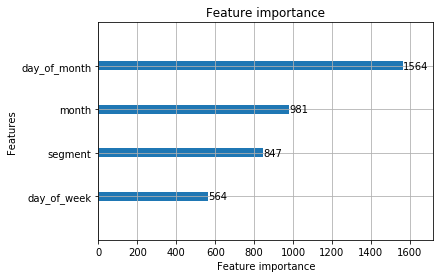

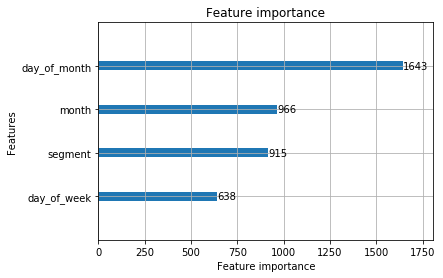

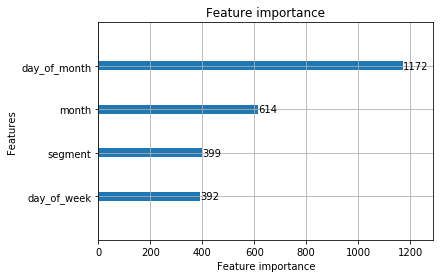

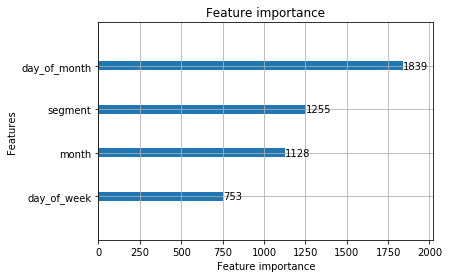

In [75]:
for model in models:
    lgb.plot_importance(model)
    plt.show()

In [76]:
test_df.head()

,id,application_date,segment,case_count
0,1,2019-07-06,1,1942.710525
1,2,2019-07-07,1,1309.863948
2,3,2019-07-08,1,2208.173965
3,4,2019-07-09,1,1956.624235
4,5,2019-07-10,1,2140.051555


In [77]:
test_df['month'] = test_df['application_date'].dt.month
test_df['day_of_month'] = test_df['application_date'].dt.day
test_df['day_of_week'] = test_df['application_date'].dt.dayofweek

In [78]:
test_df.shape

(180, 7)

In [79]:
temp_df = test_df[['id','application_date']]
test_df = test_df[feat_cols]

In [80]:
predictions = []
predictions = (sum([model.predict(test_df) for model in models])/folds)

In [81]:
len(predictions)

180

In [82]:
test_df = pd.read_csv('/kaggle/input/ltfs-2/test_1eLl9Yf.csv', parse_dates=['application_date'])
test_df['case_count'] = pd.Series(predictions)

In [83]:
test_df.to_csv('submission_1.csv', index=False)